In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from mpl_toolkits.mplot3d import Axes3D

In [2]:
G = 6.67430e-20  # km**3/(kg * s**2)
m_1 = m_2 = 1.0e26  # kg

In [3]:
R_1_0 = np.array([0, 0, 0])
R_2_0 = np.array([0, 3000, 0])
dotR_1_0 = np.array([0, 0, 0])
dotR_2_0 = np.array([0, 0, 40])

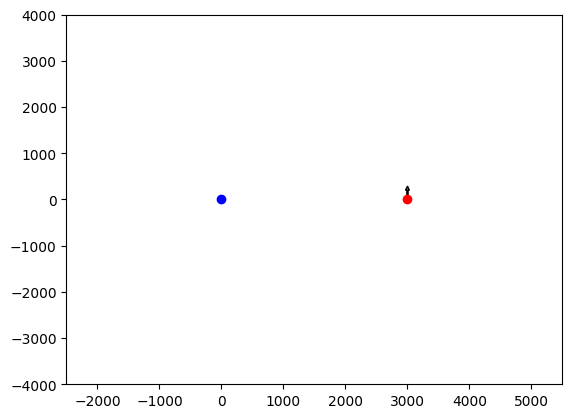

In [4]:
def plot_state(ax, Y, arrow_scale=5):
    R_1, R_2, dotR_1, dotR_2 = Y[:3], Y[3:6], Y[6:9], Y[9:12]
    r = R_2 - R_1

    ax.plot(*R_1[1:], 'bo', label="m_1")
    #ax.annotate("1", R_1[1:], textcoords='offset pixels', xytext=(10, 10))
    ax.plot(*R_2[1:], 'ro', label="m_2")
    #ax.annotate("2", R_2[1:], textcoords='offset pixels', xytext=(10, 10))

    if np.linalg.norm(dotR_1) > 0:
        ax.arrow(*R_1[1:], *dotR_1[1:] * arrow_scale, width=20)

    if np.linalg.norm(dotR_2_0) > 0:
        ax.arrow(*R_2[1:], *dotR_2[1:] * arrow_scale, width=20)

    bounding_box = np.array([-4000, 4000])
    xlim = bounding_box + (r[1] / 2)
    ylim = bounding_box + (r[2] / 2)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

Y_0 = np.hstack([R_1_0, R_2_0, dotR_1_0, dotR_2_0])
    
ax = plt.gca()
plot_state(ax, Y_0)
plt.show()

In [5]:
def two_body_kepler(t, Y):
    R_1, R_2, dotR_1, dotR_2 = Y[:3], Y[3:6], Y[6:9], Y[9:12]
    
    Yn = np.zeros_like(Y)
    
    # Change in positions is equal to velocity
    Yn[:6] = Y[6:]
    
    # Change in velocity is equal to acceleration
    r = R_2 - R_1
    
    gp = r * G / np.linalg.norm(r)**3
    a_1 = m_2 * gp
    a_2 = -m_1 * gp
    
    Yn[6:9] = a_1
    Yn[9:12] = a_2
    
    return Yn

In [6]:
sol = solve_ivp(two_body_kepler, [0, 480], Y_0)

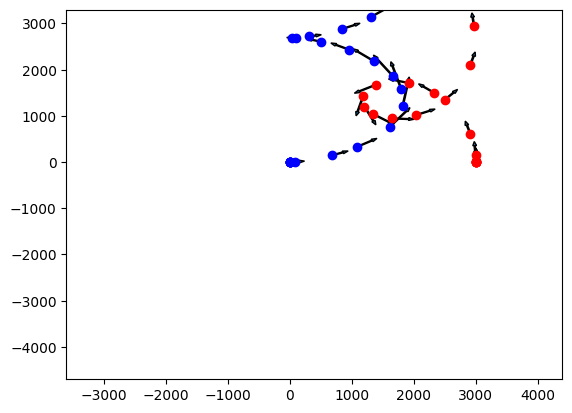

In [7]:
ax = plt.gca()
for i in range(0, 50):
    plot_state(ax, sol.y.T[i])
    
plt.show()